# GNN + XAI Standard Pipeline

## Data Preprocessing - Similarity Network Fusion for Tabular Data

sorry i didn't have a dataset so i just downloaded from kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

here, im using **similarity network fusion** to build a network representation from tabular data: https://www.nature.com/articles/nmeth.2810


in our projects, were using a kg but im too lazy to get kg dataset

In [1]:
!ls

 Dataset  '[NODE_CLASSIFICATION] GNN + XAI Standard Pipeline.ipynb'


In [2]:
#stl
import os
import warnings
from tqdm import tqdm

#data handling
import pandas as pd
import numpy as np

#stats|
import scipy
import sklearn
import missingno as mso

#network
import networkx as nx

#vis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale = 1.5)
sns.set_theme()

In [3]:
df = pd.read_csv("Dataset/breast_cancer_wisconsin_kaggle.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**ids are patients, columns are features**

In [4]:
#labels 
labels = df["diagnosis"]

#remove na, id, labels
df = df[[i for i in df.columns if i not in ["diagnosis", "id", "Unnamed: 32"]]]
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
#set categorical labels to labels
from sklearn.preprocessing import LabelEncoder

#encode cat_df
labels = np.array(LabelEncoder().fit_transform(labels))
labels.shape

(569,)

### Similarity Network Fusion for Network Creation

Here, I use gaussian kernel to generate a similarity score between the samples, and use the similarity score as edge weights to the network. I remove self edges and create a threshold for edges to introduce sparsity

In [6]:
from scipy.spatial.distance import pdist, squareform

#using gaussian kernel as similarity score for edges
pairwise_dists = squareform(pdist(df, 'euclidean'))
gauss_kern = np.exp(-pairwise_dists ** 2 / pairwise_dists.std() ** 2)
gauss_kern.shape

(569, 569)

In [7]:
#network creation
G = nx.from_numpy_array(gauss_kern)
G.remove_edges_from(nx.selfloop_edges(G))
print("nodes:", len(G.nodes))
print("edges:", len(G.edges))

nodes: 569
edges: 161596


len: 161596
top 40 percent of edges: 64638.4
range (min, max): (3.189377428081924e-23, 0.999966415494069)
mean: 0.5334002487412506
std: 0.3821035316599838


Text(0.5, 1.0, 'Distribution of all Edges')

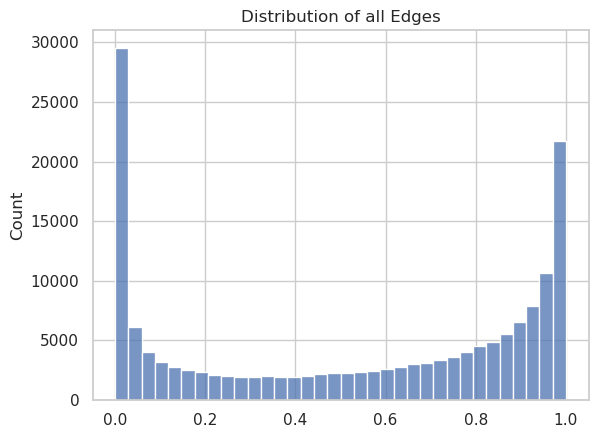

In [8]:
#finding a threshold, top 15% of edge weights
edge_val = [attrs["weight"] for a, b, attrs in G.edges(data=True)]
print("len:", len(edge_val))

percentage = 0.40

print("top 40 percent of edges: %s" % (percentage * len(edge_val)))

print("range (min, max): (%s, %s)" % (min(edge_val), max(edge_val)))
print("mean: %s" % (sum(edge_val) / len(edge_val)))
print("std: %s" % np.array(edge_val).std())

sns.set_style('whitegrid')
sns.histplot(edge_val)
plt.title("Distribution of all Edges")

**ofc, for this dataset, similarity network fusion is shit. we'll just do it anyways**

len: 64638
range (min, max): (0.7721953572673994, 0.999966415494069)
mean: 0.9229606680671001
std: 0.06593111015360162


Text(0.5, 1.0, 'Distribution of Top 15% Edges')

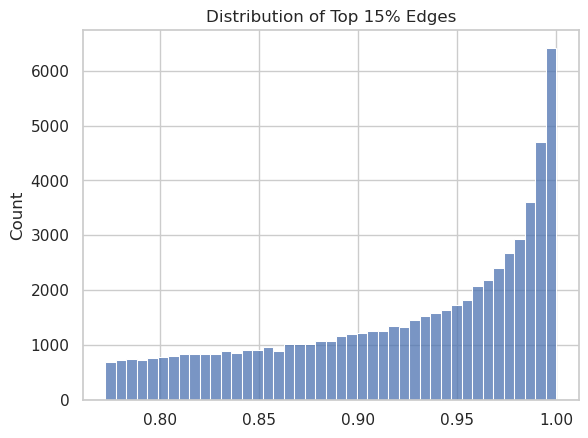

In [9]:
#cut off edges to create a sparse graph. 
ALL_edges = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
TOP_edges = ALL_edges[(len(edge_val) - int(percentage * len(edge_val))):]
TOP_edge_val = [attrs["weight"] for a, b, attrs in TOP_edges]
print("len:", len(TOP_edge_val))

print("range (min, max): (%s, %s)" % (min(TOP_edge_val), max(TOP_edge_val)))
print("mean: %s" % (sum(TOP_edge_val) / len(TOP_edge_val)))
print("std: %s" % np.array(TOP_edge_val).std())

sns.set_style('whitegrid')
sns.histplot(TOP_edge_val)
plt.title("Distribution of Top 15% Edges")

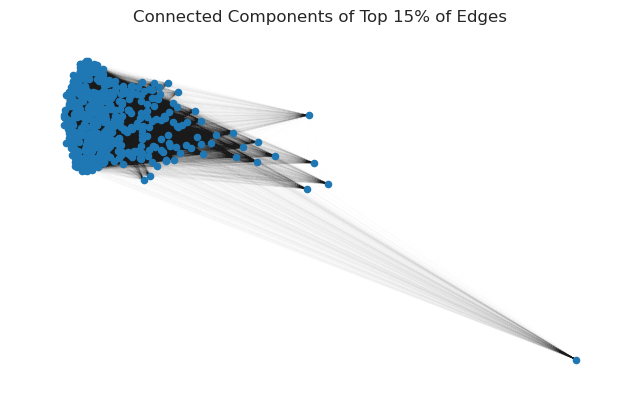

In [10]:
#VISUALIZE
fig = plt.figure(figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G, seed=10396953)
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.005)
ax.set_title("Connected Components of Top 15% of Edges")
ax.set_axis_off()

network done, node features done, labels done

## Graph Deep Learning! Node Classification

pyg documentation to make own graph from KG: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.data.Data.html#torch_geometric.data.Data

In [11]:
from torch_geometric.utils.convert import from_networkx

g = from_networkx(G)
g

Data(edge_index=[2, 323192], weight=[323192], num_nodes=569)

In [12]:
import torch
#add in node features and labels

#node features
g.x = torch.Tensor(df.to_numpy())

#labels
g.y = torch.Tensor(np.array(labels))
g

Data(edge_index=[2, 323192], weight=[323192], num_nodes=569, x=[569, 30], y=[569])

### Model Creation

In [13]:
#deep learning STL
import torch
import torch.nn.functional as F
from torch.nn import BatchNorm1d 
from torch.nn import Linear

#data loading
from torch_geometric.loader import DataLoader

#parallel
from torch_geometric.nn import DataParallel
from torch_geometric.loader import DataListLoader

#layers
from torch_geometric.nn import GCNConv
from torch_geometric.nn.conv import GATConv
from torch_geometric.nn.conv import SAGEConv

#accuracy metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#5 fold CV
from sklearn.model_selection import StratifiedKFold

#collections
import collections 
import collections.abc

#iteration tracking
from tqdm.notebook import tqdm

In [14]:
#GAT with 4 attn heads
class GAT(torch.nn.Module):
        def __init__(self,
                 num_layers,
                 num_heads,
                 node_features = 30,
                 hidden_channels = 64, 
                 out_channels = 1):
    
            super(GAT, self).__init__()

            #storing the layers (you dont have to do this)
            self.module_list = torch.nn.ModuleList([])
            
            self.in_layer = GATConv(in_channels = node_features, out_channels = hidden_channels, heads = num_heads, concat = True)

            #add hidden layers to module list
            for i in range(num_layers):
                self.module_list.append(GATConv(in_channels = hidden_channels * num_heads, out_channels = hidden_channels, heads = num_heads, concat = True))

            self.out_layer = Linear(hidden_channels * num_heads, out_channels)


        def forward(self, x, edge_index):
            
            #layer 1
            x = self.in_layer(x, edge_index).relu()

            #hidden layers
            for i in range(len(self.module_list)):
                x = self.module_list[i](x, edge_index).relu()
                
            #norm
            #x = self.batch_norm(x)

            #linear
            x = self.out_layer(x)

            return x    

### Training Preparation

In [15]:
!nvidia-smi

Mon Mar  4 10:42:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.154.05             Driver Version: 535.154.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3080        Off | 00000000:08:00.0  On |                  N/A |
|  0%   26C    P8              36W / 370W |    321MiB / 10240MiB |     12%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
device = torch.device("cuda:0")

### 5-fold Stratified CV with BCE Loss for Binary Classification

In [17]:
#moving to gpu
g = g.to(device)

#model list for 5fold cv, 3 layer GAT with 4 attention heads each
model_list = [GAT(num_layers = 4, num_heads = 2).to(device) for i in range(5)]

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import torchvision

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

epoch_num = 50
threshold = 0.5

for i, (train_index, test_index) in enumerate(skf.split(g.x.cpu(), g.y.cpu())):

    #set model
    model = model_list[i]
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = epoch_num)
    
    criterion = torch.nn.BCEWithLogitsLoss().to(device)
    
    for i in tqdm(range(epoch_num), desc = "Fold %s" % str(i + 1)):
        
        model.train()
        optimizer.zero_grad()

        #run entire graph through gnn
        out = model(g.x, g.edge_index)
        
        #flatten to match shape, run through BCE focal loss
        #loss only calculated from train nodes
        loss = criterion(out.squeeze()[train_index], g.y[train_index])
        
        loss.backward()
        optimizer.step()
        scheduler.step()

    model.eval()

    probs = torch.sigmoid(out.detach()).cpu().numpy()
    y_preds = (probs >= threshold).astype(int)

    #calculate train accuracy
    accuracy = accuracy_score(y_true = g.y.cpu()[train_index], y_pred = y_preds[train_index])
    auc = roc_auc_score(y_true = g.y.cpu()[train_index], y_score = y_preds[train_index])
    f1 = f1_score(y_true = g.y.cpu()[train_index], y_pred = y_preds[train_index])
    precision = precision_score(y_true = g.y.cpu()[train_index], y_pred = y_preds[train_index])
    recall = recall_score(y_true = g.y.cpu()[train_index], y_pred = y_preds[train_index])
    print("[Training Metrics] ACC: %.3f, AUC: %.3f, F1: %.3f, Precision: %.3f, Recall: %.3f" % (accuracy, auc, f1, precision, recall))


    #calculate test accuracy
    accuracy = accuracy_score(y_true = g.y.cpu()[test_index], y_pred = y_preds[test_index])
    auc = roc_auc_score(y_true = g.y.cpu()[test_index], y_score = y_preds[test_index])
    f1 = f1_score(y_true = g.y.cpu()[test_index], y_pred = y_preds[test_index])
    precision = precision_score(y_true = g.y.cpu()[test_index], y_pred = y_preds[test_index])
    recall = recall_score(y_true = g.y.cpu()[test_index], y_pred = y_preds[test_index])
    print("[Test Metrics] ACC: %.3f, AUC: %.3f, F1: %.3f, Precision: %.3f, Recall: %.3f" % (accuracy, auc, f1, precision, recall))
    
    
    

Fold 1:   0%|          | 0/50 [00:00<?, ?it/s]

[Training Metrics] ACC: 0.629, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000
[Test Metrics] ACC: 0.623, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000


Fold 2:   0%|          | 0/50 [00:00<?, ?it/s]

[Training Metrics] ACC: 0.629, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000
[Test Metrics] ACC: 0.623, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000


Fold 3:   0%|          | 0/50 [00:00<?, ?it/s]

[Training Metrics] ACC: 0.626, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000
[Test Metrics] ACC: 0.632, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000


Fold 4:   0%|          | 0/50 [00:00<?, ?it/s]

[Training Metrics] ACC: 0.626, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000
[Test Metrics] ACC: 0.632, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000


Fold 5:   0%|          | 0/50 [00:00<?, ?it/s]

[Training Metrics] ACC: 0.627, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000
[Test Metrics] ACC: 0.628, AUC: 0.500, F1: 0.000, Precision: 0.000, Recall: 0.000


## XAI to find Information Rich Subgraphs

### Using best GNN model for XAI

In [23]:
best_model = model_list[3]
best_model

GAT(
  (module_list): ModuleList(
    (0-3): 4 x GATConv(128, 64, heads=2)
  )
  (in_layer): GATConv(30, 64, heads=2)
  (out_layer): Linear(in_features=128, out_features=1, bias=True)
)

**starting xai using base GNNExplainer** https://arxiv.org/abs/1903.03894

gnnexplainer pyg documentation: https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.explain.algorithm.GNNExplainer.html

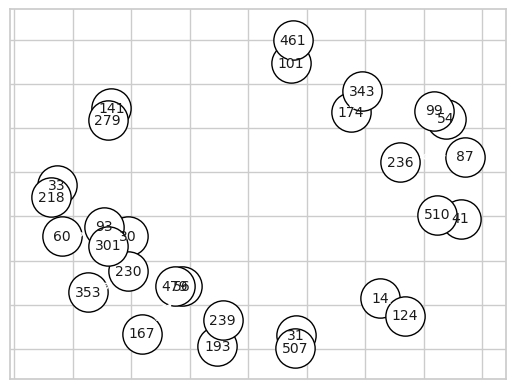

In [25]:
from torch_geometric.explain import Explainer, GNNExplainer


#node id are list of ints from 0 to len(nodes)
#explain node 5
#threshold is top 15 features
top_features = 15
node_to_explain = 5

#use the actual algorithm instead of the higher level Explainer class

xai_model = Explainer(
    model = best_model,
    algorithm = GNNExplainer(epochs=200),
    explanation_type = 'model',
    node_mask_type = 'attributes',
    edge_mask_type = 'object',
    model_config= dict(
                        mode='multiclass_classification',
                        task_level='node',
                        return_type='log_probs',
                      ),
    threshold_config=dict(threshold_type  = 'topk', value = top_features)
                                )


subgraph = xai_model(g.x, g.edge_index, index=node_to_explain)
subgraph.visualize_graph()

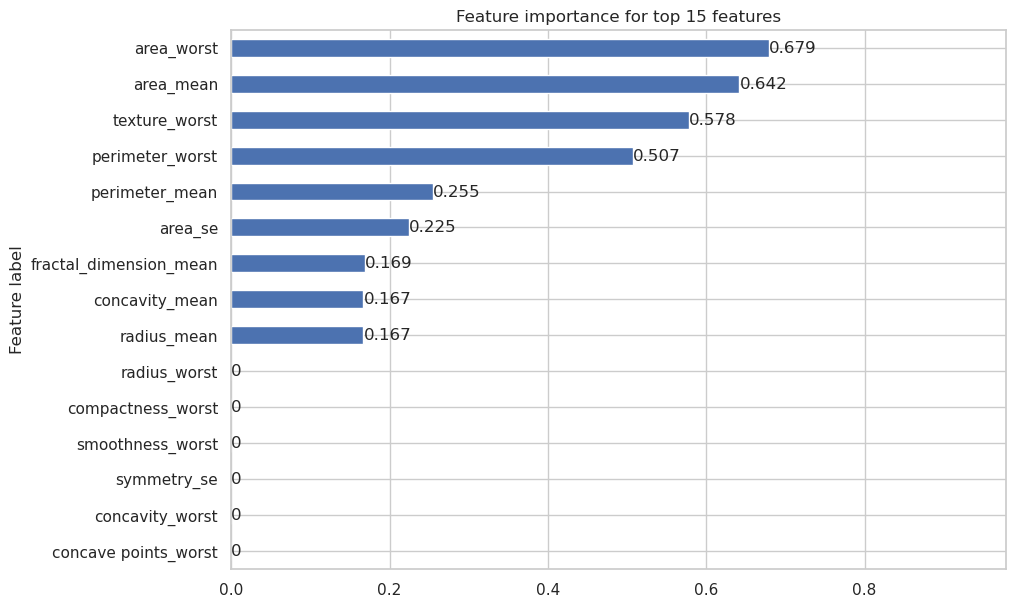

In [37]:
chart = subgraph.visualize_feature_importance(top_k=15, feat_labels = df.columns.to_list())
